<a href="https://colab.research.google.com/github/Daniel-de-Jesus/Popula-o-de-rua-de-Belo-Horizonte/blob/main/C%C3%B3pia_de_GraficosIniciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise dos dados da populaçao de rua de Belo Horizonte
    Nestre projeto eu irei organizar os dados abertos sobre a populaçao de rua de Belo Horizonte disponíveis no sítio da prefeitura (https://dados.pbh.gov.br/dataset/populacao-de-rua/resource/44baba43-85ba-4838-8c6e-6adcb469e03b?inner_span=True)
    e fazer gráficos que possibilitem extrairmos boas ideias e tomar ciencia das principais correlaçoes existentes no espectro do grupo
    

In [ ]:
#Cabecalho

import pandas as pd
import seaborn as sns
import numpy as np
import csv
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# podemos carregar os arquivos em forma de dataaframes com o uso do pandas

#cria diretamento o dataframe
df_09_2020 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/09_2020.csv')
df_10_2020 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/10_2020.csv')
df_11_2020 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/11_2020.csv')
df_12_2020 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/12_2020.csv')
df_01_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/01_2021.csv')
df_02_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/02_2021.csv')
df_03_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/03_2021.csv')
df_04_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/04_2021.csv')
df_05_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/05_2021.csv')
df_06_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/06_2021.csv')
df_07_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/07_2021.csv')
df_08_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/08_2021.csv')
df_09_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/09_2021.csv')
df_10_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/10_2021.csv')
df_11_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/11_2021.csv')
df_12_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/12_2021.csv')

##O comportamento da população de total de rua cai de forma interessante em alguns períodos do ano. Este resultado pode ser avaliado da seguinte forma:

A população total em situação de rua apresentam crescimento linear com o tempo ao longo dos meses do ano e, cai em períodos festivos de meio e fim de ano. Isso leva a uma queda na demanda dos servições relacionados no período.

O gráfico abaixo exemplifica a situação.

Isto desmistifica a opinião popular acerca do grupo, uma vez que a variação nesse período é um traço da população de rua, cerca de 5% de variação se comparados os meses de novembro e dezembro no período analisado.
No ano seguinte, o mesmo não acontece. A quantidade total de moradores continua a subir monotonicamente no período. Isto indica um aumento brusco na população total de pessoas em situação de rua e leva a conclusão de qua a população nos meses seguintes ira crescer de forma explosiva.

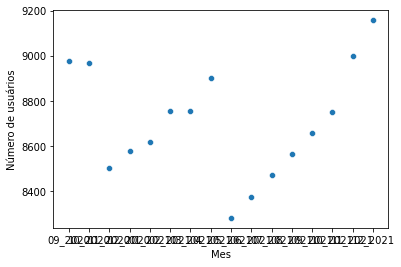

In [ ]:
#criando uma lista de dataframes para iterar
dft= [df_09_2020, df_10_2020, df_11_2020, df_12_2020, df_01_2021, df_02_2021, df_03_2021, df_04_2021, df_05_2021, df_06_2021, df_07_2021, df_08_2021, df_09_2021, df_10_2021, df_11_2021, df_12_2021]
#print('Existem ', len(dft), 'conjuntos de dados dentro de dft')

t=0
populacao_mes= []

for i in dft:
    t+=1
    populacao_mes.append(i.shape[0])


#lista de meses nos quais os dados foram coletados
Mes= ['09_2020', '10_2020', '11_2020', '12_2020', '01_2021', '02_2021', '03_2021', '04_2021', '05_2021', '06_2021', '07_2021', '08_2021', '09_2021', '10_2021', '11_2021', '12_2021']

#datafreme de numero de usuarios x ano
df_users=pd.DataFrame({'Mes':Mes,
                  'Número de usuários':populacao_mes,})
#sns.pairplot(df_users)
sns.scatterplot(x='Mes', y='Número de usuários', data= df_users)

In [ ]:
df_users['Número de usuários'].min()

8282

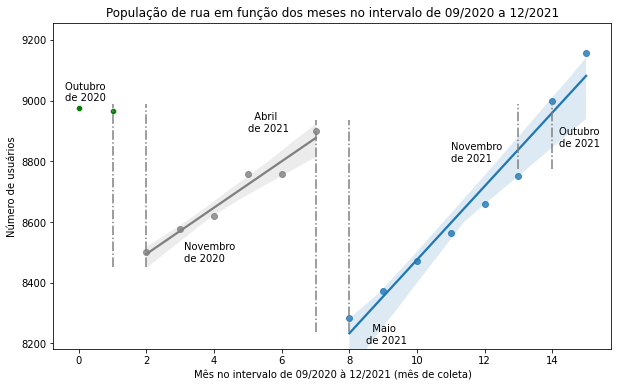

In [ ]:
#Vamos clusterizar os 16 grupos segundo a tendencia que apresentam:
#grupo1: mes[0], mes[1]
#grupo2: mes[2], mes[3], mes[4], mes[5], mes[6], mes[7]
#grupo2: mes[8], mes[9], mes[10], mes[11], mes[12], mes[13], mes[14], mes[15]
plt.figure(figsize=(10,6))
plt.title("População de rua em função dos meses no intervalo de 09/2020 a 12/2021")


mask= [i for i in range(df_users.shape[0])]
grupo1= pd.DataFrame({'Mes':[i for i in range(2)],'Número de usuários':[populacao_mes[i] for i in range(2)]})
grupo2= pd.DataFrame({'Mes':[i for i in range(2, 8)],'Número de usuários':[populacao_mes[i] for i in range(2, 8)]})
grupo3= pd.DataFrame({'Mes':[i for i in range(8,16)],'Número de usuários':[populacao_mes[i] for i in range(8,16)],})

sns.scatterplot(x='Mes', y='Número de usuários', data= grupo1, color= 'green')
sns.regplot(x='Mes', y='Número de usuários', data= grupo2, color ='grey')
sns.regplot(x='Mes', y='Número de usuários', data= grupo3)
plt.xlabel("Mês no intervalo de 09/2020 à 12/2021 (mês de coleta)")
plt.ylim([df_users['Número de usuários'].min()-100, df_users['Número de usuários'].max()+100])

plt.annotate('Novembro \nde 2020', xy=(3.1,8470))
plt.annotate('  Abril \nde 2021', xy=(5,8900))
plt.annotate('Outubro \nde 2020', xy=(-0.4,9000))
plt.annotate('  Maio \nde 2021', xy=(8.5,8200))
plt.annotate('Novembro \nde 2021', xy=(11,8800))
plt.annotate('Outubro \nde 2021', xy=(14.2,8850))

plt.axvline(x=1, ymin=0.25, ymax=0.75, color= 'grey', ls='-.')
plt.axvline(x=2,  ymin=0.25, ymax=0.75, color= 'grey', ls='-.')
plt.axvline(x=7,  ymin=0.05, ymax=0.7, color= 'grey', ls='-.')
plt.axvline(x=8,  ymin=0.05, ymax=0.7, color= 'grey', ls='-.')

plt.axvline(x=13,  ymin=0.55, ymax=0.75, color= 'grey', ls='-.')
plt.axvline(x=14,  ymin=0.55, ymax=0.75, color= 'grey', ls='-.')

##Vamos avaliar como a renda mensal evolui em função do tempo.

###No período de Novembro de 2020 à Abril de 2021, a população de rua aumenta enquanto a renda média desta população diminui.
  
    Este resultado, em primeira análise,
    mostra que a remuneração do índivíduo em situação de rua
    não é o fator mais determinante de sua condição.

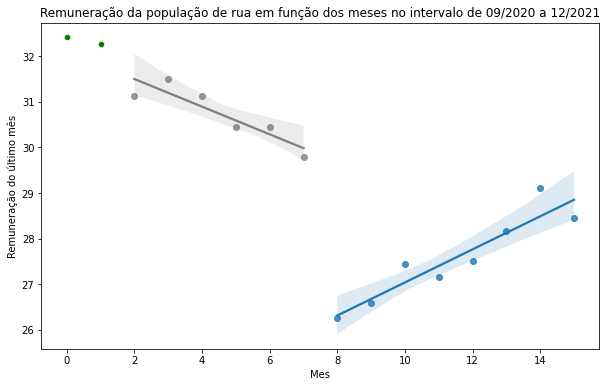

In [ ]:
#df_renda_mes= pd.DataFrame({'Renda média mês':renda_media})
#df_renda_mes
renda_media=[]
for item in dft:
  #print(f'valor de renda média {i["VAL_REMUNERACAO_MES_PASSADO"].mean()}')
  renda_media.append(round(item['VAL_REMUNERACAO_MES_PASSADO'].mean(), 2))
renda_media
df_renda_mes= pd.DataFrame({'Mes': Mes, 'Remuneração do último mês': renda_media})

plt.figure(figsize=(10,6))
plt.title("Remuneração da população de rua em função dos meses no intervalo de 09/2020 a 12/2021")

renda_grupo1= pd.DataFrame({'Mes':[i for i in range(2)],'Remuneração do último mês':[renda_media[i] for i in range(2)]})
renda_grupo2= pd.DataFrame({'Mes':[i for i in range(2, 8)],'Remuneração do último mês':[renda_media[i] for i in range(2, 8)]})
renda_grupo3= pd.DataFrame({'Mes':[i for i in range(8,16)],'Remuneração do último mês':[renda_media[i] for i in range(8,16)],})

sns.scatterplot(x='Mes', y='Remuneração do último mês', data= renda_grupo1, color= 'green')
sns.regplot(x='Mes', y='Remuneração do último mês', data= renda_grupo2, color ='grey')
sns.regplot(x='Mes', y='Remuneração do último mês', data= renda_grupo3)

##Vamos fazer um gráfico de número de moradores de rua e remuneração do último mês.

    Como já discutido no gráfico anterior,
    a correlação entre o número de moradores
    e a remuneração apresenta um padrão complexo,
    que varia de valores negativos na primeira metade do ano
    para positivos na segunda metade.

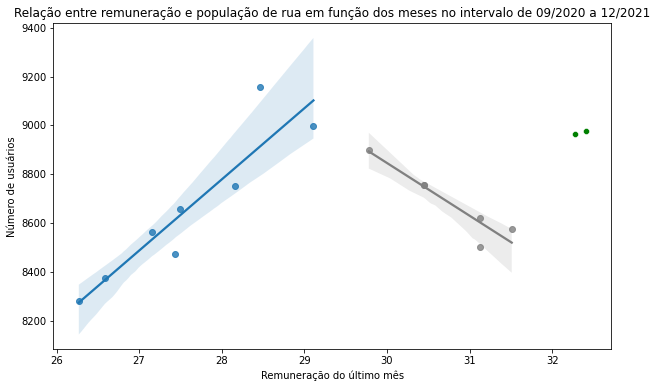

In [ ]:
df_corr_renda_pop1= pd.DataFrame({'Número de usuários':grupo1['Número de usuários'], 'Remuneração do último mês':renda_grupo1['Remuneração do último mês']})
df_corr_renda_pop2= pd.DataFrame({'Número de usuários':grupo2['Número de usuários'], 'Remuneração do último mês':renda_grupo2['Remuneração do último mês']})
df_corr_renda_pop3= pd.DataFrame({'Número de usuários':grupo3['Número de usuários'], 'Remuneração do último mês':renda_grupo3['Remuneração do último mês']})

plt.figure(figsize=(10,6))
plt.title("Relação entre remuneração e população de rua em função dos meses no intervalo de 09/2020 a 12/2021")

sns.scatterplot(x='Remuneração do último mês', y='Número de usuários', data= df_corr_renda_pop1, color= 'green')
sns.regplot(x='Remuneração do último mês',  y='Número de usuários',data= df_corr_renda_pop2, color ='grey')
sns.regplot(x='Remuneração do último mês',  y='Número de usuários',data= df_corr_renda_pop3)

In [ ]:
#População total

pop_total= df_users['Número de usuários'].sum()
print(f'A população total de moradores de rua é de : {pop_total}')

A população total de moradores de rua é de : 139314
